### 의사결정 나무(Decision Tree)
: 데이터의 분류 및 회귀에 사용되는 지도학습 알고리즘

#### 문제정의
: 서울 지역(구)의 경도와 위도 정보를 사용하여 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("../Data/seoul_district.csv")
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [4]:
test_df = pd.read_csv("../Data/seoul_dong.csv")
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [5]:
# train_df의 label 갯수 확인(빈도수)
train_df.label.value_counts()

label
강서    5
강남    5
강북    5
강동    5
Name: count, dtype: int64

In [6]:
# test_df의 label 갯수 확인(빈도수)
test_df.label.value_counts()

label
강서    5
강남    5
강북    5
강동    5
Name: count, dtype: int64

In [7]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


---
### 시각화

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

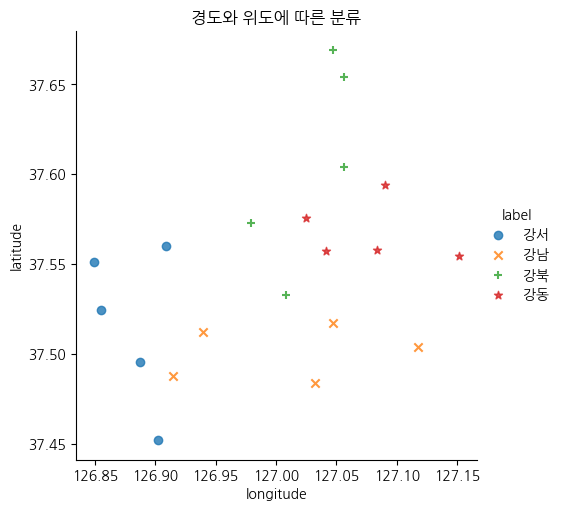

In [12]:
# 경도와 위도에 따른 데이터 시각화
sns.lmplot(
    x='longitude',
    y='latitude',
    data=train_df,
    fit_reg=False,
    hue='label',
    markers=['o','x','+',"*"]
)

plt.title('경도와 위도에 따른 분류')
plt.show()

### 데이터 다듬기
- 학습 및 테스트에 필요없는 feature를 제거
- 구이름 및 동이름은 학습 및 테스트에 필요없으므로 제거

In [15]:
train_df.drop(
    ['district'],
    axis='columns',
    inplace=True
)
train_df.head()

,longitude,latitude,label
0,126.849500,37.551000,강서
1,126.855396,37.524240,강서
2,126.887400,37.495400,강서
3,126.902000,37.451900,강서
4,126.908728,37.560229,강서


In [17]:
test_df.drop(
    ['dong'],
    axis='columns',
    inplace=True
)
test_df.head()

,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서


In [18]:
train_data = train_df[['longitude', 'latitude']]
train_target = train_df['label']

In [19]:
test_data = test_df[['longitude','latitude']]
test_target = test_df['label']

In [20]:
# 의사결정 너무 모델
from sklearn.tree import DecisionTreeClassifier

In [21]:
# 학습시키기
clf = DecisionTreeClassifier(random_state=35).fit(train_data, train_target)

In [22]:
print(clf.score(train_data, train_target))
print(clf.score(test_data, test_target))

1.0
0.95


In [23]:
train_df.shape

(20, 3)

In [24]:
test_df.shape

(20, 3)

### Confusion Matrix

In [26]:
from sklearn.metrics import accuracy_score
pred = clf.predict(test_data)
pred

array(['강서', '강서', '강서', '강서', '강서', '강남', '강남', '강남', '강남', '강남', '강북',
       '강북', '강동', '강북', '강북', '강동', '강동', '강동', '강동', '강동'], dtype=object)

In [27]:
accuracy_score(test_target, pred)

0.95

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_target.unique()

array(['강서', '강남', '강북', '강동'], dtype=object)

In [30]:
conf_matrix = confusion_matrix(test_target, pred)
conf_matrix

array([[5, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

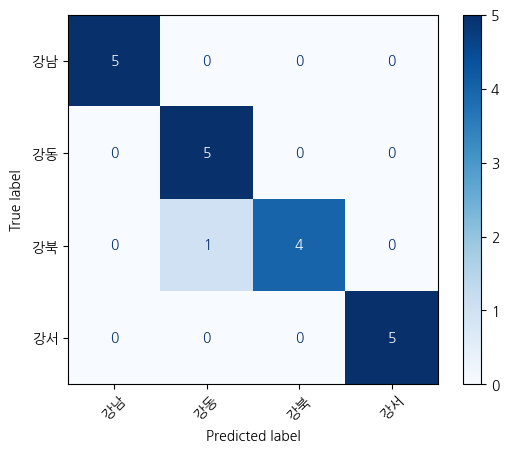

In [34]:
target_name = ['강남', '강동', '강북',' 강서']

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=45
)

plt.show()

In [35]:
# tree의 시각화
from sklearn.tree import plot_tree

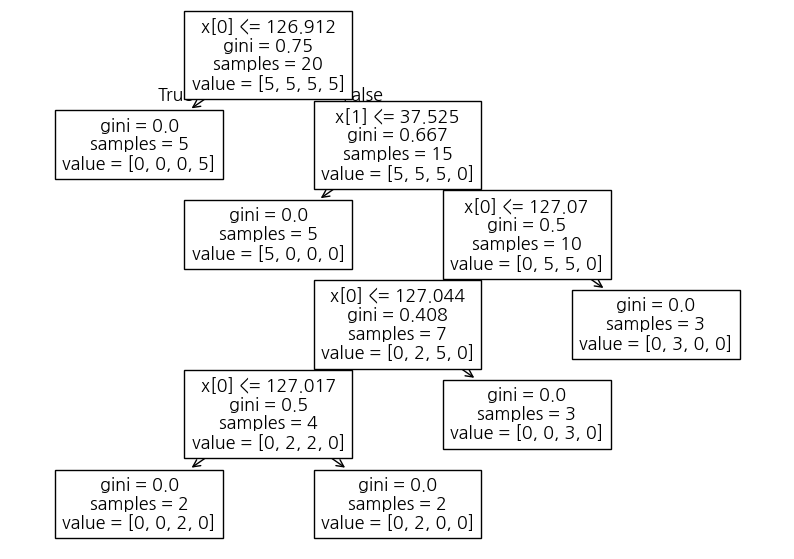

In [36]:
plt.figure(figsize=(10, 7))
plot_tree(clf)
plt.show()